In [1]:
import os, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
def data_pipe(
            data_path = "data/dataset_sdn.csv"
            ):
        df = pd.read_csv(data_path)
        df['Protocol'] = df['Protocol'].astype('category')
        df['Protocol'] = df['Protocol'].map({'TCP': 0, 'UDP': 1, 'ICMP': 2})
        del df['src'] , df['dst']
        df.dropna(inplace=True)
        
        X = df.iloc[:, :-1].values
        Y = df.iloc[:, -1].values
        X = X.reshape(X.shape[0], 1, X.shape[1])

        return X, Y

In [5]:
X, Y = data_pipe()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
                                                X, Y, 
                                                test_size=0.2, 
                                                random_state=42
                                                )
print(f"Xtrain shape: {Xtrain.shape}")
print(f"Ytrain shape: {Ytrain.shape}")
print(f"Xtest shape: {Xtest.shape}")
print(f"Ytest shape: {Ytest.shape}")

Xtrain shape: (83071, 1, 20)
Ytrain shape: (83071,)
Xtest shape: (20768, 1, 20)
Ytest shape: (20768,)


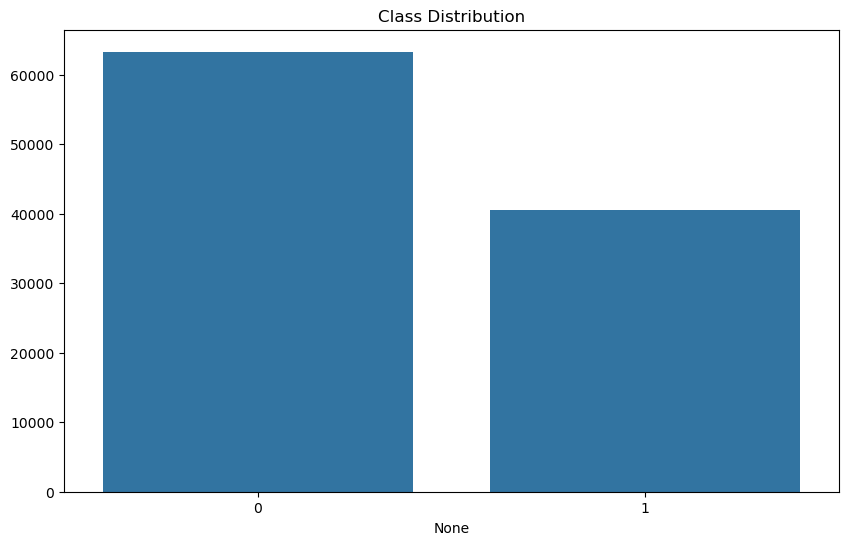

In [7]:
value_counts = pd.Series(Y).value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title("Class Distribution")
plt.show()

In [9]:
model = tf.keras.models.Sequential([
                                tf.keras.layers.LSTM(256, input_shape=(Xtrain.shape[1], Xtrain.shape[2]), return_sequences=True),
                                tf.keras.layers.LSTM(128),
                                tf.keras.layers.Dense(128, activation='relu'),
                                tf.keras.layers.Dense(32, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
                                ])
model.compile(
                optimizer='adam', 
                loss='binary_crossentropy',
                metrics=[
                        tf.keras.metrics.Precision(name='acc')
                        ]
                )
model.summary()

C:\Users\IMAKA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 256)         │       283,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 501,441 (1.91 MB)

 Trainable params: 501,441 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(
        Xtrain, 
        Ytrain,
        epochs=100, 
        batch_size=64, 
        validation_data=(
                        Xtest, 
                        Ytest
                        )
        )

Epoch 1/100
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.6384 - loss: 0.6668 - val_acc: 0.4181 - val_loss: 0.6741
Epoch 2/100
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - acc: 0.6983 - loss: 0.6650 - val_acc: 0.7167 - val_loss: 0.6657
Epoch 3/100
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - acc: 0.7131 - loss: 0.6650 - val_acc: 0.7160 - val_loss: 0.6646
Epoch 4/100
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7255 - loss: 0.6626 - val_acc: 0.7167 - val_loss: 0.6646
Epoch 5/100
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7250 - loss: 0.6630 - val_acc: 0.7404 - val_loss: 0.6672
Epoch 6/100
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.7081 - loss: 0.6618 - val_acc: 0.7200 - val_loss: 0.6644
Epoch 7/100
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - acc: 0.7279 - loss: 0.6617 - val_acc: 0.7176 - val_loss: 0.6649
Epoch 8/100
1298/1298 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - acc: 0.7053 - loss: 0.6621 - val_acc: 0.7206 - val_loss: 0.6647
Epoch 9/100
1298/1298 ━━

In [ ]:
if not os.path.exists("artifacts/ddos_model.pickle"):
    model.save("artifacts/ddos_model.pickle")

### evaluation

In [ ]:
with open("artifacts/ddos_model.pickle", "rb") as f:
    model = pickle.load(f)

In [ ]:
Ptrain = model.predict(Xtrain.reshape(Xtrain.shape[0], Xtrain.shape[2]))
Ptest = model.predict(Xtest.reshape(Xtest.shape[0], Xtest.shape[2]))

In [ ]:
cls_train = classification_report(
                                Ytrain, 
                                Ptrain,
                                target_names=[
                                            "Normal",
                                            "DDOS"
                                            ]
                                )       
cls_test = classification_report(
                                Ytest, 
                                Ptest,
                                target_names=[
                                            "Normal",
                                            "DDOS"
                                            ]
                                )   

print("Train Classification Report")
print(cls_train)

print("Test Classification Report")
print(cls_test)

In [ ]:
cm_train = confusion_matrix(Ytrain, Ptrain) 
cm_test = confusion_matrix(Ytest, Ptest)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xtricks = ['Normal', 'DDOS']
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.xtricks = ['Normal', 'DDOS']
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

### inference

In [ ]:
with open("artifacts/ddos_model.pickle", "rb") as f:
    model = pickle.load(f)

In [ ]:
sample_json = {
                "dt": 11425,
                "switch": 1,
                "src": "10.0.0.1",
                "dst": "10.0.0.8",
                "pktcount": 45304,
                "bytecount": 48294064,
                "dur": 100,
                "dur_nsec": 716000000,
                "tot_dur": 1.01E+11,
                "flows": 3,
                "packetins": 1943,
                "pktperflow": 13535,
                "byteperflow": 14428310,
                "pktrate": 451,
                "Pairflow": 0,
                "Protocol": "UDP",
                "port_no": 3,
                "tx_bytes": 143928631,
                "rx_bytes": 3917,
                "tx_kbps": 0,
                "rx_kbps": 0,
                "tot_kbps": 0,
                }

In [ ]:
def inference_ddos(sample_json):
    sample_df = pd.DataFrame([sample_json])
    sample_df['Protocol'] = sample_df['Protocol'].astype('category')
    sample_df['Protocol'] = sample_df['Protocol'].map({'TCP': 0, 'UDP': 1, 'ICMP': 2})
    del sample_df['src'] , sample_df['dst']
    prediction = model.predict(sample_df.values)
    lable = "Normal" if prediction < 0.5 else "DDOS"
    return lable

In [ ]:
inference_ddos(sample_json)